# Individual Planning Report

## Data Description

1. `players.csv` <br>
This file provides information for each player. The data includes **196 players** and **7 variables**, including:

- `experience` - Player’s gaming experience: pro, amateur, veteran _(chr)_
- `subscribe` - Subscription status: TRUE or FALSE _(lgl)_
- `hashedEmail` - Player's encrypted email address _(chr)_
- `played_hours` - Total hours played _(dbl)_
- `name` - Player’s name _(chr)_
- `gender` - Player’s gender _(chr)_
- `Age` - Player’s age in years _(dbl)_

2. `sessions.csv` <br>
This file provides information on the players' game sessions. The data includes **1535 sessions** and **5 variables**, including:

- `hashedEmail` - Player's encrypted email address _(chr)_
- `start_time` - Session start time: DD/MM/YYYY HH:mm _(chr)_
- `end_time` - Session end time: DD/MM/YYYY HH:mm _(chr)_
- `original_start_time` - Unix timestamp of session start time, in milliseconds since January 1, 1970 _(dbl)_
- `original_end_time` - Unix timestamp of session end time _(dbl)_
 

## Questions

I was interested in the broad question: <br>
*We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.*

More specifically, I wanted to investigate: 
#### Can a player’s experience and age predict average playtime per session?

Both files share the `hashedEmail` variable, allowing me to link sessions to players. I'll calculate session duration by subtracting start from end time (Unix), compute the mean session duration for each player, then merge this with player information. An important limitation is that session duration may not accurately reflect a player’s activity, as some players may be less active, or even completely inactive, while the server is running.
<br> 

## Summary Statistics

The dataset is already pretty tidy, but we can rearrange the columns in `players.csv` so that they are in a more logical order.

In [22]:
## load libraries
library(tidyverse)
library(tidymodels)

In [23]:
## load player data
player_data <- read_csv("data/players.csv") |>
    select(name, Age, gender, experience, hashedEmail, subscribe, played_hours) # rearrange columns in more logical order 
player_data

## load session data
session_data <- read_csv("data/sessions.csv")
session_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,Age,gender,experience,hashedEmail,subscribe,played_hours
<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Morgan,9,Male,Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,TRUE,30.3
Christian,17,Male,Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,TRUE,3.8
Blake,17,Male,Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE,0.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Dylan,57,Prefer not to say,Amateur,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,FALSE,0.0
Harlow,17,Male,Amateur,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,FALSE,2.3
Ahmed,NA,Other,Pro,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,TRUE,0.2


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### `Age` Statistics

In [24]:
## find mean age of players
avg_age <- player_data |>
    summarize(avg_age = round((mean(Age, na.rm = TRUE)), digits = 2))

avg_age

## find max age of players
max_age <- player_data |>
    summarize(max_age = max(Age, na.rm = TRUE))

max_age

## find min age of players
min_age <- player_data |>
    summarize(min_age = min(Age, na.rm = TRUE))

min_age

avg_age
<dbl>
21.14


max_age
<dbl>
58


min_age
<dbl>
9


#### `gender` statistics

In [25]:
## number of male players
number_males <- player_data |>
    filter(gender == "Male") |>
    nrow()
print(paste("There are", number_males, "male players."))

## number of female players
number_females <- player_data |>
    filter(gender == "Female") |>
    nrow()
print(paste("There are", number_females, "female players."))

## number of other gender players
number_other <- player_data |>
    filter(gender != "Male", gender != "Female") |>
    nrow()
print(paste("There are", number_other, "players that are neither male nor female."))

[1] "There are 124 male players."
[1] "There are 37 female players."
[1] "There are 35 players that are neither male nor female."


Most players are male, which could affect prediction accuracy for other genders if gender was one of my predictors.

#### `experience` statistics

In [26]:
## number of pro players
pros <- player_data |>
    filter(experience == "Pro") |>
    nrow()

print(paste("There are", pros, "pro players"))

## number of veteran players
veterans <- player_data |>
    filter(experience == "Veteran") |>
    nrow()

print(paste("There are", veterans, "veteran players"))

## number of pro players
amateurs <- player_data |>
    filter(experience == "Amateur") |>
    nrow()

print(paste("There are", amateurs, "amateur players"))

## number of regular players
regulars <- player_data |>
    filter(experience == "Regular") |>
    nrow()

print(paste("There are", regulars, "regular players"))

## number of beginner players
beginners <- player_data |>
    filter(experience == "Beginner") |>
    nrow()

print(paste("There are", beginners, "beginner players"))

## percentage of players that are amateur
amateur_percentage <- round((amateurs / 196), digits = 2) * 100

print(paste(amateur_percentage, "% of players are amateurs"))

[1] "There are 14 pro players"
[1] "There are 48 veteran players"
[1] "There are 63 amateur players"
[1] "There are 36 regular players"
[1] "There are 35 beginner players"
[1] "32 % of players are amateurs"


Pro players are less represented, which means predictions for them may be less accurate.

#### `subscribe` statistics

In [27]:
## number of players that are subscribed
subscribed <- player_data |>
    filter(subscribe == TRUE) |>
    nrow()

print(paste(subscribed, "players are subscribed"))

## number of players that are not subscribed
not_subscribed <- player_data |>
    filter(subscribe == FALSE) |>
    nrow()

print(paste(not_subscribed, "players are not subscribed"))

## percentage of players that are subscribed
subscription_percentage <- round((subscribed / 196), digits = 2) * 100
print(paste(subscription_percentage, "% of players are subscribed"))

## percentage of players that are not subscribed
non_subscription_percentage <- round((not_subscribed / 196), digits = 2) * 100
print(paste(non_subscription_percentage, "% of players are not subscribed"))

[1] "144 players are subscribed"
[1] "52 players are not subscribed"
[1] "73 % of players are subscribed"
[1] "27 % of players are not subscribed"


#### `played_hours` statistics

In [28]:
## mean play time for all sessions
avg_playtime <- player_data |>
    summarize(avg_playtime = round((mean(played_hours, na.rm = TRUE)), digits = 2))

avg_playtime  

## max play time for all sessions
max_playtime <- player_data |>
    summarize(max_playtime = round((max(played_hours, na.rm = TRUE)), digits = 2))

max_playtime  

avg_playtime
<dbl>
5.85


max_playtime
<dbl>
223.1


We are unsure if players joined the server at the same time, so this variable may not accurately reflect engagement levels between players. This is why I'm more interested in individual session durations!

#### `original_start_time` and `original_end_time` statistics

In [29]:
## add session duration column
sessions_with_playtime <- session_data |>
    filter(!is.na(original_end_time)) |>
    mutate(session_duration = (original_end_time - original_start_time) / 60000)

## mean start time 
avg_start <- sessions_with_playtime |>
    summarize(avg_start = round(mean(original_start_time), digits = 2))

avg_start

## mean end time 
avg_end <- sessions_with_playtime |>
    summarize(avg_end = round(mean(original_end_time), digits = 2))

avg_end

## mean session duration in minutes
avg_playtime <- sessions_with_playtime |>
    summarize(avg_playtime = round(mean(session_duration), digits = 2))

avg_playtime

## max session duration
max_playtime <- sessions_with_playtime |>
    summarize(max_playtime = round(max(session_duration), digits = 2))

max_playtime

avg_start
<dbl>
1.719193e+12


avg_end
<dbl>
1.719196e+12


avg_playtime
<dbl>
48.49


max_playtime
<dbl>
333.33


## Exploratory Data Analysis and Visualization

### Relationship between player age and total hours played

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


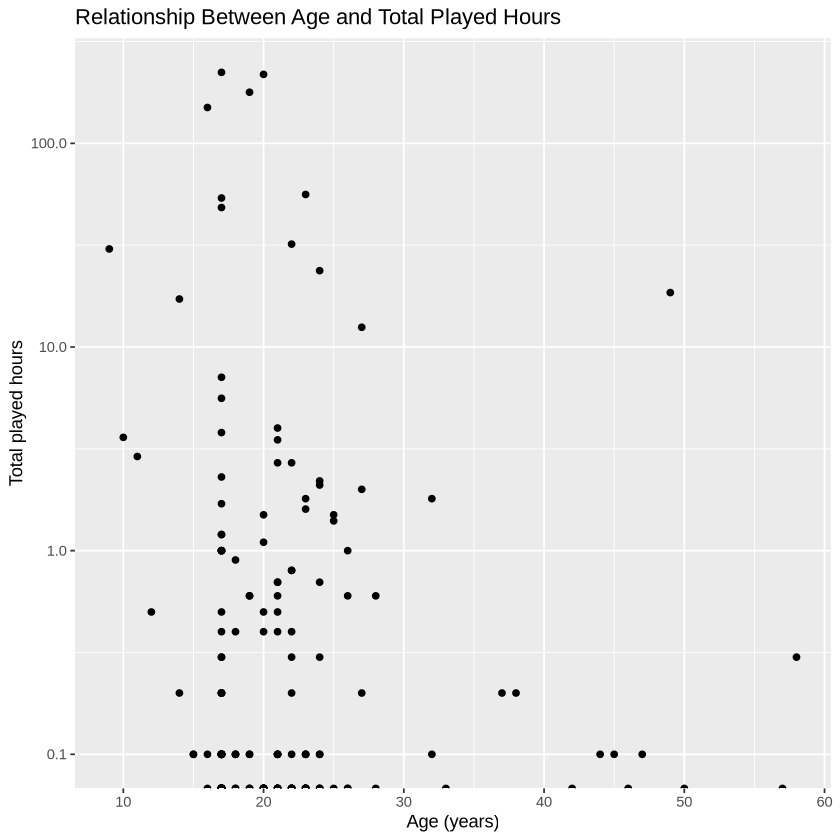

In [35]:
exp_vs_hours_played <- player_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(title = "Relationship Between Age and Total Played Hours", x = "Age (years)", y = "Total played hours")

exp_vs_hours_played

Most players are aged 15-25 and contribute the most hours, suggesting age may predict playtime.

### Hours contributed by each experience level


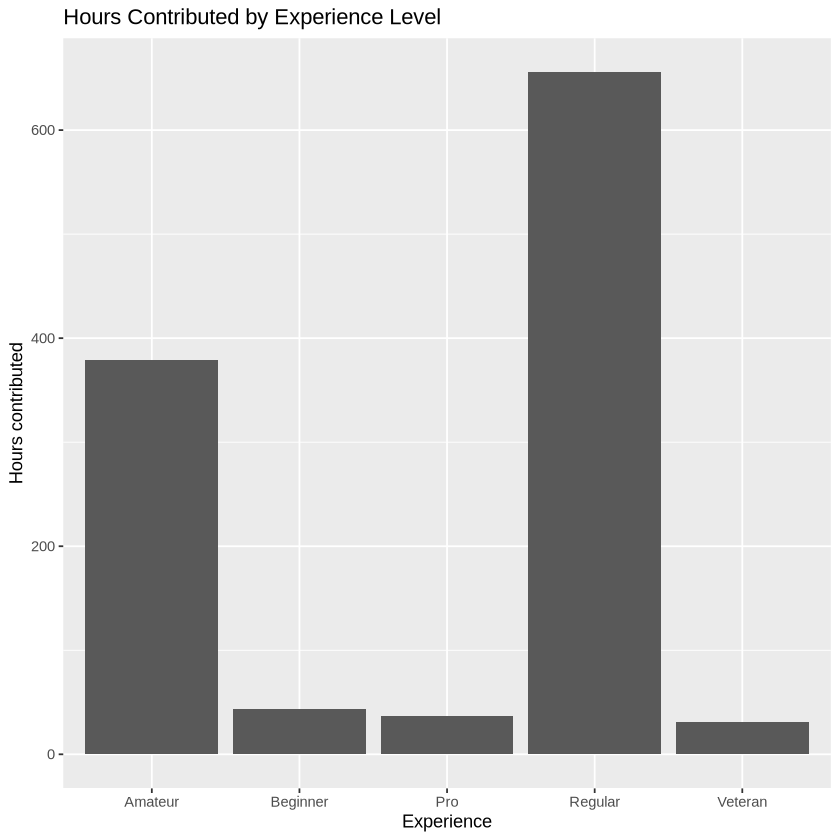

In [31]:
hrs_per_exp <- player_data |>
    ggplot(aes(x = experience, y = played_hours)) +
    geom_bar(stat="identity") +
    labs(title = "Hours Contributed by Experience Level", x = "Experience", y = "Hours contributed")

hrs_per_exp

Regular players are half as common as amateurs but contribute nearly double the playtime. Veterans make up a large demographic but contribute little, showing that experience doesn't mean more playtime.

### Hours contributed by gender

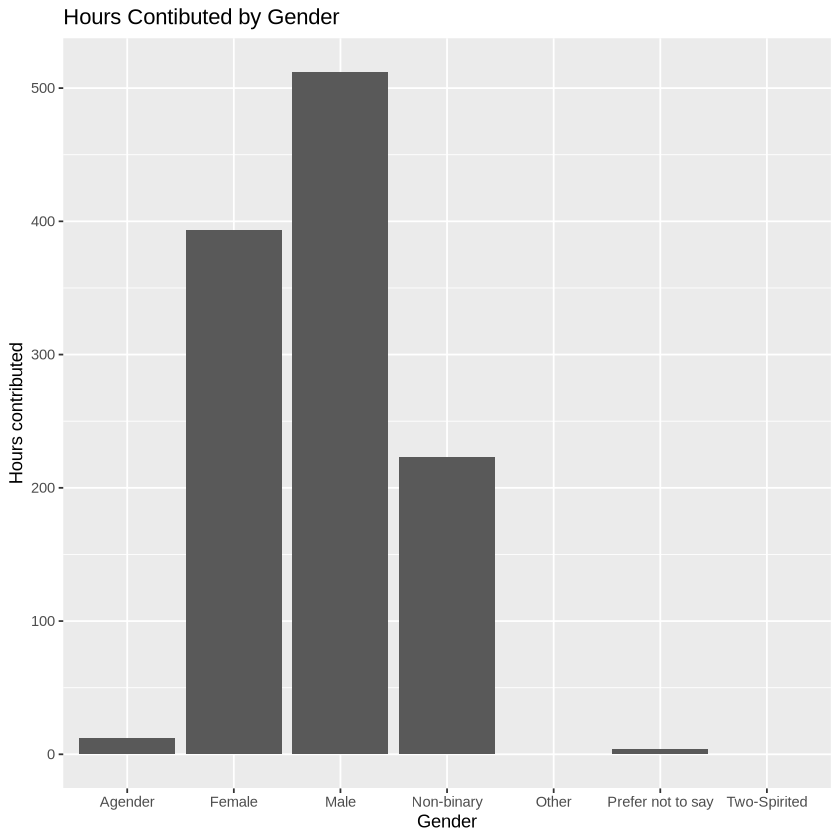

In [32]:
hrs_per_exp <- player_data |>
    ggplot(aes(x = gender, y = played_hours)) +
    geom_bar(stat = "identity") +
    labs(title = "Hours Contibuted by Gender", x = "Gender", y = "Hours contributed")

hrs_per_exp

Although male players dominate the demographic, female players contribute 80% of their playtime and non-binary players nearly half, showing that smaller groups can still contribute significant data despite being underrepresented.

### Hours contributed by subscription status


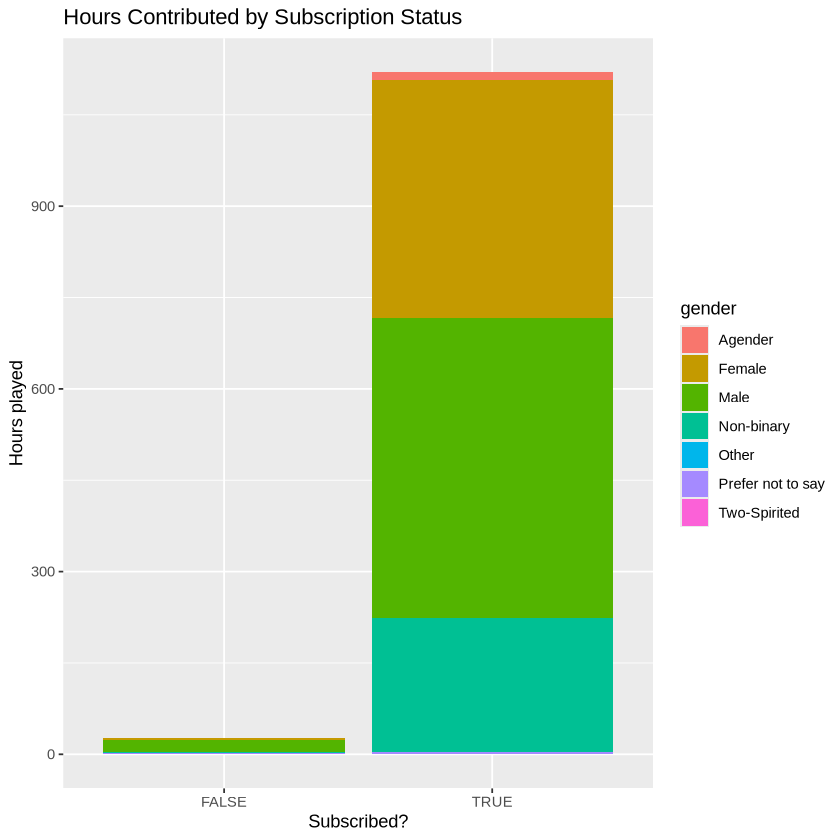

In [33]:
hrs_by_sub <- ggplot(player_data, aes(x = subscribe, y = played_hours, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Hours Contributed by Subscription Status",
       x = "Subscribed?", y = "Hours played")

hrs_by_sub

Non-subscribed players contribute very little, while male and female subscribers contribute similar hours, and non-binary subscribers contribute about half as much. Subscription status strongly influences playtime and may be worth including in my analysis.
<br>

## Methods and Plan

To predict session duration, I will use KNN regression since I'm working with a quantitative response variable. KNN is appropriate because it can capture non-linear patterns. However, it may perform poorly when data is sparse for certain groups, such as older players in this case. Since experience is a categorical variable, I'll convert it to numeric values (beginner = 1, intermediate = 2, etc.). This is a limitation because it assumes equal spacing between levels, which might not be accurate. For example, the gap between beginner and regular could differ from veteran to pro. For data processing, I'll split the data into 80% training and 20% testing before modeling. To select the optimal k value, I'll use 5-fold cross-validation on the training set, testing several k values, and choosing the one with the lowest average RMSPE. Once determined, I'll train the final model on the full training set and evaluate it on the test set using RMSPE.